In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
import itertools

import warnings                  
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("./adult_cleaned.csv")

In [3]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
2,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0
3,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,0
4,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,0


In [4]:
df.dtypes

age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
income             int64
dtype: object

In [5]:
num_df = df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']] 
cat_df = df[['workclass', 'education', 'marital.status', 'occupation',
             'relationship', 'race', 'sex']]
label=df[['income']]

In [6]:
le = LabelEncoder ()

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

## Joining the data to the numeric data

all_df = pd.concat([num_df, cat_df,label], axis=1)
all_df.head(5)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,income
0,82,9,0,4356,18,2,11,6,3,1,4,0,0
1,54,4,0,3900,40,2,5,0,6,4,4,0,0
2,41,10,0,3900,40,2,15,5,9,3,4,0,0
3,34,9,0,3770,45,2,11,0,7,4,4,0,0
4,38,6,0,3770,40,2,0,5,0,4,4,1,0


In [7]:
scale = StandardScaler()

all_df['age'] = scale.fit_transform(all_df[['age']])
all_df['education.num'] = scale.fit_transform(all_df[['education.num']])
all_df['hours.per.week'] = scale.fit_transform(all_df[['hours.per.week']])
all_df['capital.gain'] = scale.fit_transform(all_df[['capital.gain']])
all_df['capital.loss'] = scale.fit_transform(all_df[['capital.loss']])

all_df['marital.status'] = scale.fit_transform(all_df[['marital.status']])
all_df['sex'] = scale.fit_transform(all_df[['sex']])
all_df['relationship'] = scale.fit_transform(all_df[['relationship']])
all_df['education'] = scale.fit_transform(all_df[['education']])
all_df['occupation'] = scale.fit_transform(all_df[['occupation']])
all_df['race'] = scale.fit_transform(all_df[['race']])
all_df['workclass'] = scale.fit_transform(all_df[['workclass']])

all_df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,income
0,3.299099,-0.513770,-0.149218,10.443381,-1.907746,-0.20949,0.145744,2.278827,-0.729931,-0.255907,0.352317,-1.441966,0
1,1.175332,-2.615684,-0.149218,9.326999,-0.080641,-0.20949,-1.453618,-1.699351,0.007273,1.622857,0.352317,-1.441966,0
2,0.189297,-0.093388,-0.149218,9.326999,-0.080641,-0.20949,1.211985,1.615797,0.744476,0.996602,0.352317,-1.441966,0
3,-0.341645,-0.513770,-0.149218,9.008732,0.334611,-0.20949,0.145744,-1.699351,0.253007,1.622857,0.352317,-1.441966,0
4,-0.038250,-1.774918,-0.149218,9.008732,-0.080641,-0.20949,-2.786419,1.615797,-1.467134,1.622857,0.352317,0.693498,0


In [8]:
corr_matrix = all_df.corr()
corr_matrix['income'].sort_values(ascending=False)

income            1.000000
education.num     0.334905
age               0.243460
hours.per.week    0.231819
sex               0.222442
capital.gain      0.221281
capital.loss      0.149293
race              0.090976
education         0.066689
occupation        0.050307
workclass         0.016419
marital.status   -0.190163
relationship     -0.256169
Name: income, dtype: float64

In [9]:
X = all_df.drop(columns=["income", "education", "workclass", "occupation", "race"])
y = all_df["income"]

X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,marital.status,relationship,sex
0,3.299099,-0.513770,-0.149218,10.443381,-1.907746,2.278827,-0.255907,-1.441966
1,1.175332,-2.615684,-0.149218,9.326999,-0.080641,-1.699351,1.622857,-1.441966
2,0.189297,-0.093388,-0.149218,9.326999,-0.080641,1.615797,0.996602,-1.441966
3,-0.341645,-0.513770,-0.149218,9.008732,0.334611,-1.699351,1.622857,-1.441966
4,-0.038250,-1.774918,-0.149218,9.008732,-0.080641,1.615797,1.622857,0.693498


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22003, 8)
(5501, 8)
(22003,)
(5501,)


In [11]:
Model = [
    LogisticRegression(),
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()] 

# Logging for Visual Comparison
log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print(f'\033[94m-'*30, '\n')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print(f'\033[94m-'*30)

------------------------------ 

LogisticRegression
Accuracy: 82.07599%
Log Loss: 0.39615
------------------------------ 

XGBClassifier
Accuracy: 85.96619%
Log Loss: 0.29345
------------------------------ 

KNeighborsClassifier
Accuracy: 81.54881%
Log Loss: 2.4291
------------------------------ 

SVC
Accuracy: 83.42120%
Log Loss: 0.38219
------------------------------ 

DecisionTreeClassifier
Accuracy: 82.18506%
Log Loss: 3.7186
------------------------------ 

RandomForestClassifier
Accuracy: 83.60298%
Log Loss: 0.55749
------------------------------ 

GaussianNB
Accuracy: 79.09471%
Log Loss: 0.86318
------------------------------


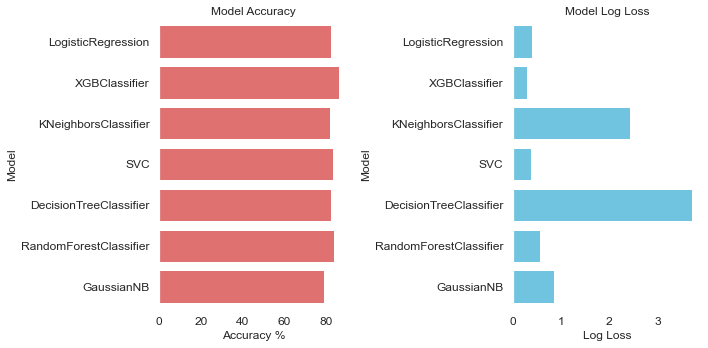

In [12]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Model', data=log, color='#f25e5e')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict={'fontsize':12})

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log, color='#5ecdf2')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict={'fontsize':12})

plt.savefig("accuracy.jpeg",dpi=200)
plt.show()

In [13]:
mod_XGB = XGBClassifier()
mod_XGB.fit(X_train, y_train)
y_pred_XGB = mod_XGB.predict(X_test)

In [14]:
cnf_matrix = confusion_matrix(y_test, y_pred_XGB)

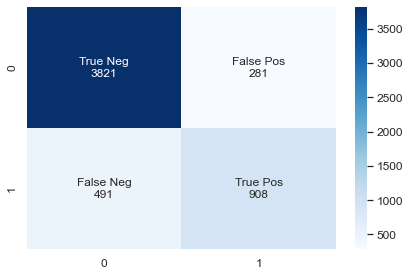

In [16]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig("cnf_matrix",dpi=200)
# sns.heatmap(cnf_matrix, cmap='Blues', annot=True, fmt='d')

In conclusion, it is possible to utilize different machine learning models to accurately predict the income category. Of all the models, XGBoost performs the best, which achieve an accuracy of 86%. The classification models also tell us that education level, age, occupation type and sex are highly related to the salary according to this census dataset.